<a href="https://colab.research.google.com/github/YoonSungLee/DataStructure/blob/master/Lecture/%EA%B3%B5%EB%B6%80%EC%9E%90%EB%A3%8C)_Ch_3__Stack_Queue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'><div style="text-align: center">Ch 3. Stack and Queue</font> 

### Stack
* Stack은 LIFO(Last In First Out)의 자료구조다.
    
* 아이템을 추가하는 것을 push라고 하고 아이템을 빼는 것을 pop 이라고 한다.
    
<center> ![](https://drive.google.com/uc?id=1C1GWp5LRf-_nRBPCFrVItbYjuVrnJuOt) </center>

<center> ![](https://drive.google.com/uc?id=1YN4oXTesVL2j86ikgy4L0sKGz_hjWDaP) </center>

<center><img src="https://drive.google.com/uc?id=1cdCZQdf26i-G1aRm3hhKsx28moDeUbQO" width="500" height="350"></center>

In [0]:
class Stack:
    def __init__(self):
        self.s = []
        
    def push(self, item):
        self.s.append(item)
        
    def pop(self):
        if self.isEmpty() == False: # 빈 리스트일때 self.s.pop() 을 하면 오류 발생
            return self.s.pop(-1)
        else:
            return None
        
    def peek(self):
        if self.isEmpty() == False: 
            return self.s[-1]
        else:
            return None
    
    def isEmpty(self):
        if len(self.s) > 0:
            return False
        else:
            return True
        
    def size(self):
        return len(self.s)
    
    def print(self):
        print(self.s)
        
#     def delete(self):
#       if self.isEmpty() == False:
#         del self.s[-1]
#       else:
#         return None
        
s = Stack()
s.push('a')
s.push('b')
s.push('c')
print(s.peek())
s.print()
s.isEmpty()
s.size()


c
['a', 'b', 'c']


3

In [0]:
# Stack 응용문제: 문자열 reverse

def reverse(a):
    s = Stack()
    b = ""
    for i in range(len(a)):
        s.push(a[i])
    for i in range(len(a)):
        b += s.pop()
    return b

a = "abcdefg"
reverse(a)

# def reverse(text):
#     a = Stack()
#     answer = ""
#     for k in text:
#         a.push(k)
#     while not(a.isEmpty()):
#         answer += a.pop()
#     return answer

'gfedcba'

In [0]:
# 수식 괄호 체크: 수식에서 '(' 이면 push, ')'이면 pop 하여 Cancel
# 수식이 끝났을 때, 스택이 비어 있으면 괄호가 정확한 것임 

def eqBraketCheck(f):
    s = Stack()
    for i in range(len(f)):
        if f[i] == '(':
            s.push(f[i])
        elif f[i] == ')':
            if s.pop() == None: return False # 조건문을 수행하면서 s.pop()을 수행한다.
    if s.isEmpty() == True:
        return True
    else:
        return False

f = '(1+2) + (3+4 = '
eqBraketCheck(f)

False

### 수식 후위표기 알고리즘

* 수식을 컴퓨터가 쉽게 계산할 수 있도록 바꾸는 알고리즘이다.
* 알고리즘을 수행하기 전에 빈 스택과 빈 리스트를 준비한다.

<center><img src="https://drive.google.com/uc?id=1NXXV3aVRu_7oihoVwgxEnVULhGvJYb3I" width="450" height="300"></center>


In [0]:
# 연산부 여부 리턴
def isOper(item):
    
    if item == '+' or item == '-' or item == '*' or item == '/':
        return True
    else:
        return False

isOper('+')

# 주어진 문자가 숫자인지 여부 리턴
def isNum(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [0]:
eq = "( 12.3 + 6 ) * 3 / 6"
eqList = eq.split(" ")
print(eqList)

s = Stack()
postEq = []

for item in eqList:
    if item == '(':
        s.push(item)
    elif item == ')':
        while True:
            _tmp = s.pop()
            if _tmp != '(':
                postEq.append(_tmp)
            else:
                break
    elif (item == '+') or (item == '-'):
        while isOper(s.peek()) == True:
                postEq.append(s.pop())
        s.push(item)
    elif (item == '*') or (item == '/'):
        while (s.peek() == '*') or (s.peek() == '/'):
                postEq.append(s.pop())
        s.push(item)
    elif isNum(item) == True:
        postEq.append(item)

while s.isEmpty() != True:
    postEq.append(s.pop())

print(postEq)

['(', '12.3', '+', '6', ')', '*', '3', '/', '6']
['12.3', '6', '+', '3', '*', '6', '/']


### 후위 표기식 계산 알고리즘

<center><img src="https://drive.google.com/uc?id=1nOn-sTEP-Nwqjf0BGSzv5WMHA2KjMQHx" width="450" height="120"></center>


In [0]:
s = Stack()
for item in postEq:
    if isOper(item) == False:
        s.push(item)
    else:
        num2 = float(s.pop()) # 리스트(postEq) 안의 값들은 str 형식, num1과 num2 순서 유의
        num1 = float(s.pop()) # 리스트(postEq) 안의 값들은 str 형식
        if item == '+': s.push(str(num1 + num2))
        elif item == '-': s.push(str(num1 - num2))   
        elif item == '*': s.push(str(num1 * num2)) 
        elif item == '/': s.push(str(num1 / num2))
print(s.pop())

9.15


H.W # 5: 위 후위연산자를 이용한 수식계산 클래스를 만들고 이를 이용해 수식을 연산해보세요.(import 이용)

계산기 GUI: https://drive.google.com/open?id=1uvo-5vocNjcR3EHEYsgQUvifNlvJoVpg



In [0]:
import tkinter as tk

class Window:
    def __init__(self):
        window = tk.Tk()
        window.title("Simple Calc")

        f1 = tk.Frame(window, relief="solid", bd=2, padx=2, pady=2)
        f2 = tk.Frame(window, relief="solid", bd=2, padx=2, pady=2)

        # Frame 1
        self.eq = "0"
        large_font = ('Verdana',21)
        self.entryVar = tk.StringVar(value=self.eq)

        eqEntry = tk.Entry(f1, bg="yellow", width=11, textvariable=self.entryVar,font=large_font, justify='right')
        delButton = tk.Button(f1, text="del", height=2, width=6, command=self.delete)
        eqEntry.pack(side=tk.LEFT, padx=4)
        delButton.pack(side=tk.LEFT, padx=0)

        # Frame 2
        buttonList = ["7","8","9","+","c",
                      "4","5","6","-","(",
                      "1","2","3","*",")",
                      "0",".","=","/"," "]

        rowIdx=0
        colIdx=0

        butList=[None] * 20
        i = 0

        for btn in buttonList:
            butList[i] = tk.Button(f2, text=btn, height=3, width=6, command=(lambda char=btn: self.butEvent(char)))
            butList[i].grid(row=rowIdx, column=colIdx)
            if btn==" ": butList[i]['state'] = 'disabled'
            i += 1
            colIdx += 1
            if colIdx > 4:
                colIdx = 0
                rowIdx += 1

        f1.pack(pady=2)
        f2.pack()

        window.mainloop()

    def butEvent(self,key):
        if key=="c":
            self.eq="0"
        elif key=="=":
            self.eq = str(eval(self.eq)) # eval : String 안의 내용들을 종합하여 계산하는 함수(파이썬에서만 있는 함수) - Stack을 이용해서 구현 가능
        else:
            if self.eq=="0":
                self.eq = key
            else:
                self.eq += key

        self.entryVar.set(self.eq)

    def delete(self):
        self.eq = self.eq[0:len(self.eq)-1]
        if len(self.eq)==0: eq = "0"
        self.entryVar.set(self.eq)

a = Window()

TclError: ignored

### Queue
* Queue는 FIFO(First In First Out)의 자료구조다.
* 큐 활용 예
 * 생산자 --> 소비자(수요와 공급 조절), 프린터 대기, 캐쉬 메모리, 블랙박스, 커피가게, 시분할 서비스 등

<center><img src="https://drive.google.com/uc?id=1fTPQTJx2r836Fv6jQ9BbIb8GCwmKG-Jy" width="400" height="200"></center>
    
* 아이템을 추가하는 것을 enQueue라고 하고 아이템을 빼는 것을 deQueue라고 한다.
    
<center><img src="https://drive.google.com/uc?id=1twpmQh4ndhMUUB_htRCfuMHb7ZViqR0S" width="450" height="120"></center>

* Queue ADT
<center><img src="https://drive.google.com/uc?id=19gwuZfQyeoKtFPqW0mcp49_Z-6u5gmyb" width="500" height="350"></center>

In [0]:
class Queue:
    def __init__(self):
        self.q = []
        
    def enQueue(self, item):
        self.q.append(item)
        
    def deQueue(self):
        if self.isEmpty() == False: 
            return self.q.pop(0)
    
    def size(self):
        return len(self.q)
    
    def isEmpty(self):
        if len(self.q) > 0:
            return False
        else:
            return True
        
    def peek(self):
        if self.isEmpty() == False: 
            return self.q[0]
    
    def delete(self, item):
        if item in self.q: 
            self.q.remove(item)
        else:
            print("해당 아이템이 존재하지 않습니다.")

q = Queue()
q.enQueue('a')
q.enQueue('b')
q.enQueue('c')

q.delete('d')

print(q.deQueue())
print(q.deQueue())
print(q.deQueue())
print(q.deQueue())



해당 아이템이 존재하지 않습니다.
a
b
c
None


* Queuing Theory(대기이론) : 여러 개의 큐로 이루어진 복잡한 모델을 쪼개서 각각의 모델에 대한 분석을 하고, 난수를 돌려 관찰하는 이론

### Queue 응용문제
* 커피가게에 손님이 도착해서 커피를 사가지고 나가는 과정에서 커피를 주문해서 받는 시간까지를 Queue로 본다.
* Queue 길이가 길면 손님이 다른 가게로 이동하므로 Queue 길이를 너무 길지 않도록 관리하는 것이 중요하다.
* 커피가게 손님 도착간격을 확률변수 X 라고 하자.

$$ X \sim exp(\lambda) $$
$$ f(x) = \frac {1}{\lambda} exp(-\frac {x}{\lambda}), \ E(X) = \lambda, \ V(X)= \lambda^2$$

* 평균적으로 람다시간당 한 사람씩 손님이 도착하는 분포
* 지수분포는 어떤 사건이 발생하기까지 걸리는 시간에 관심이 있다.
* 푸아송분포는 단위 시간 내에 어떤 사건이 몇 번 발생하는지 관심이 있다.

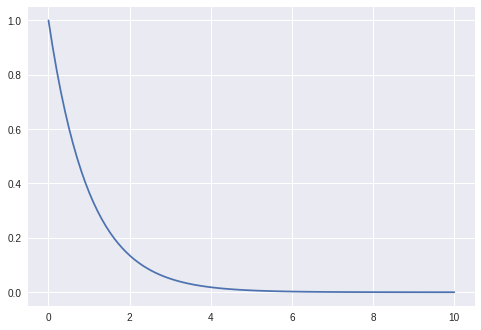

In [0]:
import matplotlib.pyplot as plt
import numpy as np
lamda = 1
x = np.linspace(0, 10,100) # 시작, 끝(포함), 갯수
pdf = (1/lamda) * np.exp(-x/lamda)
plt.plot(x,pdf)
plt.show()

In [0]:
# x는 오픈 시간 후, 랜덤하게 고객이 도착하는 시간을 의미함
import numpy as np
np.random.seed(seed=1)
x = np.random.exponential(1, 100) # 람다 1, 인원수 100명 / x는 손님과 손님사이의 시간 간격
# np.random.exponential(x,y) : 람다가 x인 지수분포에서 y개 샘플 추출
print(np.mean(x), np.std(x)) # 평균과 표준편차가 람다 1에 가까워진다
entTime = np.cumsum(x) # 손님이 커피숍에 들어온 시간(절대시간), np.cumsum()은 각 원소들의 누적 합을 표시함
print(entTime)

0.9482394982391559 0.9115733473949409
[ 0.53960584  1.81373109  1.81384547  2.17385823  2.33256782  2.42945169
  2.63556633  3.05954281  3.56499535  4.33895513  4.8822945   6.03817421
  6.26689861  8.3715959   8.39936553  9.50944586 10.0495369  10.86754422
 11.01881714 11.23959036 12.85275806 16.30298527 16.67902389 17.85772738
 19.94834436 22.19840022 22.28727976 22.32711763 22.51324292 24.6181459
 24.72167125 25.26830995 28.43576883 29.19754884 30.37480543 30.7538949
 31.91385378 33.7133975  33.73185508 35.11872686 39.61603766 40.99502143
 41.32414234 42.88136419 42.9903156  43.58432997 45.97679057 46.32438423
 46.66374611 46.80304102 46.82259797 47.9583999  48.19618527 48.50481408
 49.18124802 49.23608712 50.08967916 50.24835674 51.13826248 52.34143014
 52.44938784 52.98391887 54.16939761 54.70413907 54.75538337 55.52303086
 56.61306399 57.33644177 60.2295228  61.11275369 63.44995005 63.59784085
 63.74782264 65.39491719 65.90187835 66.08262618 68.70691326 69.13426493
 70.52381299 71

#### 참고: 지수분포 난수를 어떻게 만들 수 있는가?(Inverse Transform Sampling)

* 모든 난수는 U(0,1) 로 부터 만들 수 있다.
* $ X \sim F(x) $ 일때 , $ X = F^{-1}(U), U \sim U(0,1) $ 의 CDF는 F(x)가 성립한다.

$ \hspace{33pt} f(x) = \frac {1}{\lambda} exp(-\frac {x}{\lambda}) $

$$ F(x) = \int_0^x f(x) dx =  \int_0^x \frac {1}{\lambda} exp(-\frac {x}{\lambda}) dx = 1-exp(-\frac {x}{\lambda}) $$

$$ U = 1-exp(-\frac {x}{\lambda}) $$
$$ U = exp(-\frac {x}{\lambda}) $$
$$ ln \ U = -\frac {x}{\lambda} $$

$$ \therefore X = - \lambda \cdot  ln \ U$$
<center><img src="https://drive.google.com/uc?id=1EqPQBYTEyZ5udKYJK4FafgG3wZSmNX0D" width="300" height="200"></center>

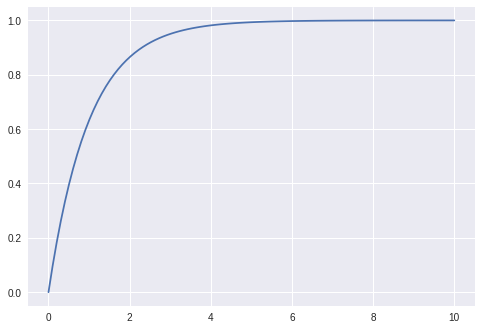

In [0]:
import matplotlib.pyplot as plt
lamda = 1
x = np.linspace(0, 10,100)
cdf = 1 - np.exp(-x/lamda)
plt.plot(x,cdf)
plt.show()

(array([198., 152., 139., 110.,  73.,  55.,  59.,  42.,  35.,  27.,  14.,
         11.,  19.,  12.,   7.,   7.,  10.,   3.,   7.,   8.,   3.,   3.,
          1.,   0.,   1.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([2.68073952e-03, 2.19800623e-01, 4.36920507e-01, 6.54040391e-01,
        8.71160274e-01, 1.08828016e+00, 1.30540004e+00, 1.52251993e+00,
        1.73963981e+00, 1.95675969e+00, 2.17387958e+00, 2.39099946e+00,
        2.60811934e+00, 2.82523923e+00, 3.04235911e+00, 3.25947899e+00,
        3.47659888e+00, 3.69371876e+00, 3.91083865e+00, 4.12795853e+00,
        4.34507841e+00, 4.56219830e+00, 4.77931818e+00, 4.99643806e+00,
        5.21355795e+00, 5.43067783e+00, 5.64779772e+00, 5.86491760e+00,
        6.08203748e+00, 6.29915737e+00, 6.51627725e+00, 6.73339713e+00,
        6.95051702e+00, 7.16763690e+00, 7.38475679e+00, 7.60187667e+00,
        7.81899655e+00]),
 <a list of 36 Patch objects>)

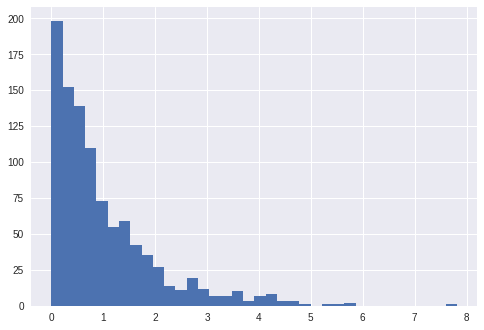

In [0]:
import matplotlib.pyplot as plt
import numpy as np
u = np.random.random(1000) # 0에서 1 사이의 난수 1000개 생성
lamda = 1
x = -lamda * np.log(u) # numpy.log(u) 는 밑이 자연상수, numpy.log10(u)는 밑이 10
plt.hist(x, bins='auto') # bins는 데이터를 나눌 개수(막대그래프의 수)

* 손님이 도착해서 커피를 주문하고 받는 시간 확률변수 Y라고 하고 $ Y \sim N(1, 0.2^2) $ 이라고 가정하자.
* 그러면 손님이 커피를 가지고 나가는 시간은 아래와 같이 모의실험할 수 있다.

In [0]:
import numpy as np
np.random.seed(seed=1)
cookTime = np.random.normal(1, 0.2, 10)
# np.random.normal(x,y,z) : 평균 x, 표준편차가 y인 정규분포에서 z개 샘플 추출
cookTime = np.where(cookTime < 0, 0,cookTime)
# np.where(조건문,True일 경우, False일 경우)
cookTime

array([1.32486907, 0.87764872, 0.89436565, 0.78540628, 1.17308153,
       0.53969226, 1.34896235, 0.84775862, 1.06380782, 0.95012592])

In [0]:
np.mean(cookTime)

0.9805718218387799

In [0]:
np.std(cookTime)

0.23817971041278044

* 손님이 도착해서 커피를 주문하고 받는 시간 확률변수 Y라고 하고 $ Y \sim N(0.5, 0.2^2) $ 이라고 가정하자.
* 그러면 손님이 커피를 가지고 나가는 시간은 아래와 같이 모의실험할 수 있다.

In [0]:
np.random.seed(seed=1)
cookTime = np.random.normal(0.5, 0.2, 10)
cookTime

array([0.82486907, 0.37764872, 0.39436565, 0.28540628, 0.67308153,
       0.03969226, 0.84896235, 0.34775862, 0.56380782, 0.45012592])

In [0]:
np.mean(cookTime)

0.48057182183878

In [0]:
np.std(cookTime)

0.2381797104127804

* 아래는 큐 대기인원을 계산한 예다. 이 예에서는 CookTime = 1분으로 고정했다.

<center><img src="https://drive.google.com/uc?id=1BRqUT8geULTRVMw6uYsId7B3kvFvLoj4" width="400" height="250"></center>

<font color='red'>H.W # 6: 위의 예처럼 오전 8시에 시작해서 오후 10시에 종료하는 커피가게 큐 대기인원의 분포를 모의실험하시오.</font>
* 큐에 최대 인원은 몇 명인가?
* 시간대 별로 도착시간을 조정해보시오.
* 주문을 두명이 받는다면 어떻게 되는가?

Hint>
* Cust Class를 만들고, arriveTime, orderTime, outTime을 관리한다.
* Shop Class를 만들고, custQueue를 만든다.
  * getSize method: 큐 크기를 구한다.
  * entCust method: 큐에 cust를 넣는다.
  * outCust method: 큐에서 cust를 내보낸다.(조건은 현재 시간보다 outTime이 작은 cust는 deQueue 한다.)
  * getLast method: 큐에 가장 최근에 들어간 고객을 리턴한다.
  
* main 프로그램
  * 커피가게를 만든다.
  * curTime = 0 (8시) 부터 14\*60 분 보다 작을 때까지 아래를 반복한다.
  * 고객을 생성한다.  (도착시간 정의)
  * 큐에 고객이 없으면 현재 고객의 orderTime = arriveTime이고 고객이 있으면 최근에 들어간 고객의 outTime 이다.
  *  outTime = orderTime + cookTime
  * 고객을 큐에 넣는다.
  * curTime을 현재 고객의 arriveTime으로 한다.
  * 큐에서 curTime 보다 outTime이 과거인 고객은 deQueue한다.

### DeQueue(Double Ended Queue)
* 큐는 좌측에서 입력하고 우측에서 출력하는데 DeQueue는 양쪽에서 입력과 출력이 가능하다.
* 윈도우의 스크롤에서 덱을 사용하면 효율적이다.

<center><img src="https://drive.google.com/uc?id=12ARtoAaUIsV4Z76x-WV6k_5AOgZjIOZB" width="500" height="300"></center>


In [0]:
class Dequeue:
    def __init__(self):
        self.dq = []
        
    def insertFirst(self, item):
        self.dq.insert(0, item)
        
    def insertLast(self, item):
        self.dq.append(item)
        
    def isEmpty(self):
        if len(self.dq) > 0:
            return False
        else:
            return True
        
    def popFirst(self):
        return self.dq.pop(0)
    
    def popLast(self):
        return self.dq.pop(-1)
    
    def peekFirst(self):
        return self.dq[0]
    
    def peekLast(self):
        return self.dq[-1]    
    
    def print(self):
        print(self.dq)
        
    def sum(self):
        return sum(self.dq)

a = Dequeue()
a.insertFirst(2)
a.insertFirst(1)
a.insertLast(3)
a.insertLast(4)
a.print()
print(a.sum())

print(a.popFirst())
print(a.popLast())
a.print()

[1, 2, 3, 4]
10
1
4
[2, 3]


In [0]:
# Dequeue 응용문제(이동평균)
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import csv
with open('/gdrive/My Drive/dataStructure/data/stock_daily.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    data = list(reader)
    data = np.array(data).astype(float)
    # dataStructure > data > 'stock_daily.csv' 다운

In [0]:
data = data[:,-1]
data = data[::-1]
data.shape

(732,)

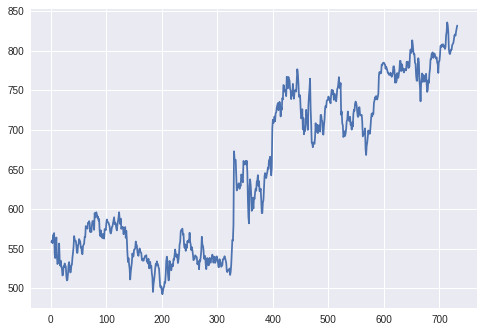

In [0]:
time = np.arange(1,733)
plt.plot(time,data)
plt.show()

#### Moving Average
* 시계열 자료의 Smoothing 방법으로 주가 추세를 이해하는데 많이 사용됨
* $ y_1, y_2,\cdots, y_n$의 k-이동평균은 $y_i$ 에 대해 $y_i, y_{i+1}, y_{i+2}, \cdots , y_{i+k-1}$  데이터를 선택해 평균을 낸 값이 $ m_{i+(k//2)} $ 이다.

* 5-이동평균은 $y_1, y_2, y_3, y_4, y_5$ 5개의 자료에 대해 평균을 구해 $m_3$에 저장한다. 다음으로는 $y_2, y_3, y_4, y_5, y_6$ 의 평균을 이 자료의 가운데 위치에 $m_4$ 로 저장한다.
<center><img src="https://drive.google.com/uc?id=1B0PuhMcVrUD1UJklof4nIJqloDsXVxsf" width="500" height="200"></center>


* 이를 Dequeue를 이용해 구현하면 이전 Dequeue에서 popFirst하고 다음 자료를 insertLast 하면 된다.


In [0]:
# 위 그래프에 5점 이동평균선을 그려보자.
dq = Dequeue()
mavg = []
k = 5
gap = k // 2 # 블랭크 공간, 이동 평균은 range[gap, data.shape[0]-gap]까지 계산하면 된다.

# 초기 덱에 k개 원소를 추가한다.
for j in range(k):
    dq.insertLast(data[j])
mavg.append(sum(dq.dq) / k)

# 3점 이동평균은 데이터 양쪽 1개씩 비어둔다. 
# 하나는 이미 계산 했으니까 다음부터 계산 range(gap+1,data.shape[0]-gap)
for i in range(gap+1,data.shape[0]-gap):
    # data.shape[0] : 자료의 총 개수
    # i : 5개 자료의 중앙값
    # gap + 1: gap 이후 하나의 연산과정을 이미 수행했으므로 1을 더한다.
    # 
    # 좌측에서 하나빼고, 우측에 하나 넣고 이동평균을 계산한다.
    _ = dq.popFirst() # 버리는 변수
    dq.insertLast(data[i+gap]) # 중앙값에서 gap을 더한 인덱스의 값을 insert한다.
    # 이전 Deque에서 좌측에서 값을 빼고, 우측에 삽입한 결과를 계산한다.
    mavg.append(dq.sum() / k)

time = np.arange(0,data.shape[0])
mavg = np.array(mavg)

In [0]:
mavg.shape


(728,)

In [0]:
data[gap:data.shape[0]-gap].shape

(728,)

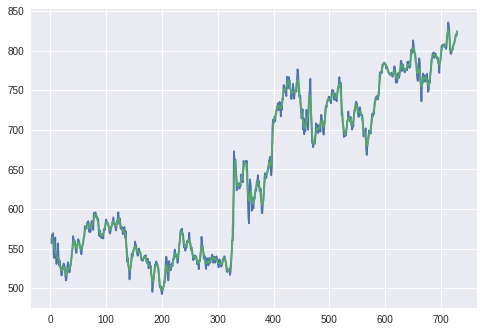

In [0]:
plt.plot(time[gap:data.shape[0]-gap],data[gap:data.shape[0]-gap])
plt.plot(time[gap:data.shape[0]-gap],mavg)
plt.show()

#### Image Blurring(이미지 뽀샵~)
* 이미지는 행렬 숫자다.
* 아래 그림은 (512, 512) 이미지이다. 이 이미지에 랜덤하게 노이즈를 만들고 다시 노이즈가 있는 이미지를 복원해보자.


In [0]:
# 예제 이미지 가져오기

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import misc
face = misc.face(gray=True)
face = face[:512, -512:] # crop out square on right
face.shape

(512, 512)

In [0]:
# 이미지 영역 30%에 랜덤 노이즈를 만든다. z = 0, 1이고, 1인 부분이 노이즈가 추가되는 부분임
z = np.random.binomial(1, 0.3, face.shape) # 1이 나올 확률이 0.3인 이항분포
noise = face.std() * 0.5 * np.random.standard_normal(face.shape) # face 변화량의 0.5만큼만 noise 생성
z = z * noise # 원본이미지의 30%만 훼손(0인 원소가 70%)
z

array([[ -0.        ,   0.        ,  -0.        , ...,  -0.        ,
         -0.        ,  37.98708253],
       [ -0.        ,   0.        ,  -0.        , ...,   0.        ,
         28.38389511,  11.71546435],
       [ 36.13777903,   0.        ,  14.87611415, ...,  -0.        ,
        -18.7697592 ,   0.        ],
       ...,
       [  0.        ,  -0.        ,  -0.        , ...,   1.41800352,
         -0.        , -13.73461832],
       [  0.        ,  -0.        ,  17.26801934, ...,   0.        ,
         -0.        ,  -0.        ],
       [  0.        ,  -0.        ,  -0.        , ...,  -0.        ,
          0.        ,   0.        ]])

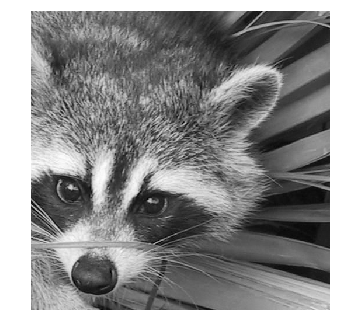

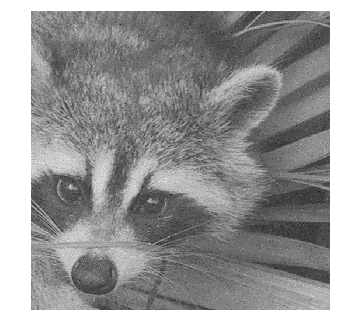

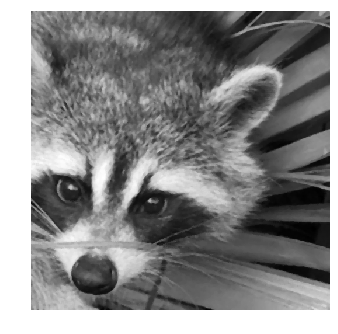

In [0]:
# 노이즈가 추가된 이미지를 만든다.
noisy_face = np.copy(face).astype(np.float) + z
# 노이즈 이미지를 미디언 필터를 이용해 노이즈를 제거한다.(윈도우 사이즈 = 5)
median_face = ndimage.median_filter(noisy_face, size=5)
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.imshow(median_face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

#### Median Filter 구현원리

   ![medianFilter](https://drive.google.com/uc?id=1znF-fK0CfTXHeUiqFLJ9GxkZGA9yHNXh)
<br>
median of [33, 54, 67, 84, 102, 163, 189, 212, 224] = 102 <br>
Window[1,1] = 102 (Change 189 -> 102)

* 아래 그림 처럼 윈도우 크기 3*3 으로 좌에서 우로 이동하면서 median을 계산한다.(noise로 인한 이상치 제거)
* 좌에서 우로 이동이 끝나면 아래로 한칸 내려와 다시 좌에서 우로 이동하면서 median을 계산한다.
* 이런 방식으로 계산하면 이미지 (1,1) ~ (510,510) 까지 계산하기 때문에 엣지 부분이 없어지고 이미지는 축소된다.

 ![medianFilter](https://drive.google.com/uc?id=1TedyalvQUq6FzzfIAbiq7yfL8T3bcz-l)
 ![medianFilter](https://drive.google.com/uc?id=1tyhWxQQZ_MxNVVGFpHFfC2eo2HOUGPeU)
  ![medianFilter](https://drive.google.com/uc?id=1wJNosniujtqNsNNBRIkTENlPUnPl-eEG)
  
* 이 계산을 보면 중첩된 부분이 계속 발생한다.
* 계산 로직 그대로 구현한 결과와 Dequeue를 사용해 중첩 부분은 놔두고 바뀌는 부분만 뺴고, 넣고 하여 구현한 결과를 비교해보자.


In [0]:
filtered = np.zeros(noisy_face.shape)
filtered
    

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
# 계산 로직 그대로 구현한 결과
import time
start = time.time()
# 3 by 3 filter로 가정하면 (1,1) 부터 시작해서 (510, 510)까지 계산하면 된다.
for i in range(1,noisy_face.shape[0]-1):
    for j in range(1,noisy_face.shape[0]-1):
        filter = Dequeue()
        for c in range(-1,2): # 해당 포인트에서 좌우 한칸씩
            for r in range(-1,2): 
                filter.insertLast(noisy_face[i+r,j+c])
        filtered[i,j] = np.median(filter.dq)
print(time.time()-start) # 계산 시간 프린트

#  deQueue를 이용하여 9개의 원소를 업데이트

18.351906299591064


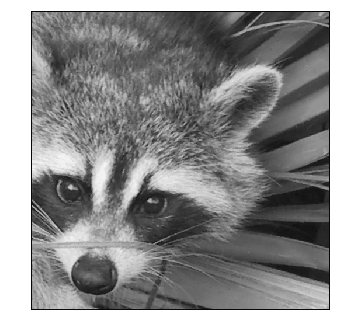

In [0]:
plt.imshow(filtered, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [0]:
# Dequeue를 사용해 중첩 부분은 놔두고 바뀌는 부분만 빼고, 넣고 하여 구현한 결과
import time
start = time.time()
filtered = np.zeros(noisy_face.shape)
filtered
windowSize = 3
gap = windowSize // 2 # 제외되는 픽셀수
        
for i in range(gap,noisy_face.shape[0]-gap):
    # 좌에서 우로 이동하고, 끝이 되면 한칸 내려서 큐를 리셋하고 진행한다.
    dq = Dequeue()
    # 초기 큐를 생성(추가순서는 빼기 쉽게 세로우선으로 추가한다.)
    for c in range(-gap,gap+1):
        for r in range(-gap,gap+1): 
            dq.insertLast(noisy_face[i+r,1+c])
            filtered[i,1] = np.median(dq.dq)
    # 생성된 큐에서 윈도우 개수 만큼 빼고. 다시 윈도우 개수 만큼 추가한다.
    for j in range(2,noisy_face.shape[0]-1):  
        for k in range(gap,-gap-1,-1):
            dq.popFirst() # 하나빼고 하나 넣고 ...
            dq.insertLast(noisy_face[i+k,j+gap])
        filtered[i,j] = np.median(dq.dq)
print(time.time()-start) # 계산 시간 프린트

16.871581315994263


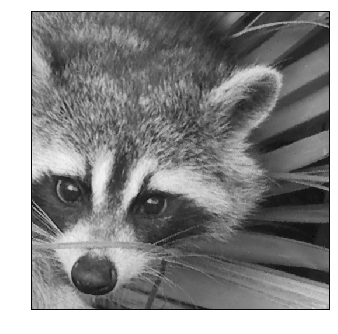

In [0]:
plt.imshow(filtered, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

<font color='red'> <H.W # 7> 여러분이 원하는 이미지를 선택하여 이미지 블러링하는 프로그램을 개발하시오.</font>

In [0]:
# 9개 원소들의 평균 이용 : 뽀샵
# 9개 원소들의 중앙값 이용 : 필터링